In [9]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh


--2024-05-09 03:59:30--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143351488 (137M) [application/octet-stream]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh.1’

Miniconda3-latest-L 100%[===================>] 136.71M  92.1MB/s    in 1.5s    

2024-05-09 03:59:32 (92.1 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh.1’ saved [143351488/143351488]



In [10]:
!bash Miniconda3-latest-Linux-x86_64.sh



Welcome to Miniconda3 py312_24.3.0-0

In order to continue the installation process, please review the license
agreement.
Please, press ENTER to continue
>>> 
END USER LICENSE AGREEMENT

Please read these Terms of Service carefully before purchasing, using,
accessing, or downloading any Anaconda Offerings (the "Offerings"). These
Anaconda Terms of Service ("TOS") are between Anaconda, Inc. ("Anaconda") and
you ("You"), the individual or entity acquiring and/or providing access to the
Offerings. These TOS govern Your access, download, installation, or use of the
Anaconda Offerings, which are provided to You in combination with the terms set
forth in the applicable Offering Description, and are hereby incorporated into
these TOS. Except where indicated otherwise, references to "You" shall include
Your Users. You hereby acknowledge that these TOS are binding, and You affirm
and signify your consent to these TOS by registering to, using, installing,
downloading, or accessing the Anaconda 

In [11]:
!source ~/.bashrc


In [12]:
!which conda


In [14]:
import subprocess

# Replace '/path/to/conda' with the actual path to the 'conda' executable in your Miniconda installation
conda_path = '/root/miniconda3/bin/conda'
command = f"{conda_path} create --name gnn"
process = subprocess.Popen(command.split(), stdout=subprocess.PIPE)
output, error = process.communicate()
print(output.decode())

Channels:
 - defaults
Platform: linux-64
Solving environment: ...working... done

## Package Plan ##

  environment location: /root/miniconda3/envs/gnn



Proceed ([y]/n)? 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
#
# To activate this environment, use
#
#     $ conda activate gnn
#
# To deactivate an active environment, use
#
#     $ conda deactivate




In [16]:
pip install ipykernel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.6 MB/s eta 0:00:00


In [17]:
!pip install -q torch

!pip show torch
import torch
print(torch.__version__)
print(torch.version.cuda)

!pip show python

import sys
print(sys.version)

# %%capture
import os
import torch
os.environ['TORCH'] = torch.__version__
os.environ['PYTHONWARNINGS'] = "ignore"

!pip install torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

Name: torch
Version: 2.2.1+cu121
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-nccl-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: fastai, torchaudio, torchdata, torchtext, torchvision
2.2.1+cu121
12.1
3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
Looking in links: https://data.pyg.org/whl/torch-2.2.1+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 78.8 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.2.1+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 10.4 MB/s eta 

In [19]:
import subprocess

# Specify the full path to the Conda executable
conda_executable = '/root/miniconda3/bin/conda'

# Command to export the environment
command = f"{conda_executable} env export --name gnn > environment.yml"

# Run the command using subprocess
process = subprocess.Popen(command, stdout=subprocess.PIPE, shell=True)
output, error = process.communicate()

# Print the output
print(output.decode())


In [20]:
import os

os.system("conda deactivate")

32512

In [21]:
import os

os.environ['CONDA_DEFAULT_ENV'] = 'gnn'

if 'CONDA_DEFAULT_ENV' in os.environ:
    print("Conda environment activated:", os.environ['CONDA_DEFAULT_ENV'])
else:
    print("Conda environment is not activated.")


Conda environment activated: gnn


In [ ]:
# !pip freeze > requirements.txt

In [22]:
!pip show torch-sparse
!pip show torch-scatter

Name: torch_sparse
Version: 0.6.18+pt22cu121
Summary: PyTorch Extension Library of Optimized Autograd Sparse Matrix Operations
Home-page: https://github.com/rusty1s/pytorch_sparse
Author: Matthias Fey
Author-email: matthias.fey@tu-dortmund.de
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: scipy
Required-by: 
Name: torch_scatter
Version: 2.1.2+pt22cu121
Summary: PyTorch Extension Library of Optimized Scatter Operations
Home-page: https://github.com/rusty1s/pytorch_scatter
Author: Matthias Fey
Author-email: matthias.fey@tu-dortmund.de
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: 


In [23]:
import random
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection, metrics, preprocessing
from sklearn.model_selection import train_test_split
import copy

import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
from networkx.drawing.layout import bipartite_layout
from torch_geometric.utils import degree
from torch import nn, optim, Tensor

from torch_sparse import SparseTensor, matmul

from torch_geometric.utils import structured_negative_sampling
from torch_geometric.data import download_url, extract_zip
from torch_geometric.nn.conv.gcn_conv import gcn_norm
from torch_geometric.nn.conv import MessagePassing
from torch_geometric.typing import Adj


from scipy import sparse
# import scipy.sparse as sp
from scipy.sparse import coo_matrix

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim


import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GCNConv, GraphConv
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [24]:
books = pd.read_csv('cleaned_books.csv', low_memory=False)
ratings = pd.read_csv('cleaned_ratings.csv', low_memory=False)
users = pd.read_csv('cleaned_users.csv', low_memory=False)

In [25]:
from IPython.display import display
print('Rating Shape',ratings.shape)
print('Book Shape',books.shape)
print('User Shape',users.shape)

print('\nRatings:')
display(ratings.head())

print('\nUsers:')
display(users.head())

print('\nBooks:')
display(books.head())



Rating Shape (36969, 3)
Book Shape (33315, 12)
User Shape (10000, 3)

Ratings:


,User-ID,ISBN,Book-Rating
0,2,1.951534e+08,0
1,10,1.841722e+09,0
2,10,8.477024e+09,6
3,19,3.757598e+08,7
4,20,4.251631e+08,0



Users:


,User-ID,Location,Age
0,2,"stockton, california, usa",18.0
1,4,"porto, v.n.gaia, portugal",17.0
2,6,"santa monica, california, usa",61.0
3,10,"albacete, wisconsin, spain",26.0
4,11,"melbourne, victoria, australia",14.0



Books:


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0,"ottawa, ontario, canada",49.0
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,2954,8,"wichita, kansas, usa",71.0
3,1558746218,A Second Chicken Soup for the Woman's Soul (Ch...,Jack Canfield,1998,Health Communications,http://images.amazon.com/images/P/1558746218.0...,http://images.amazon.com/images/P/1558746218.0...,http://images.amazon.com/images/P/1558746218.0...,3363,0,"knoxville, tennessee, usa",29.0
4,440234743,The Testament,John Grisham,1999,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,388,0,"nashville, tennessee, usa",35.0


In [26]:
common_isbn = set(ratings['ISBN']).intersection(set(books['ISBN']))

# Count the number of common ISBNs
num_common_isbn = len(common_isbn)

# Print the number of common ISBNs
print("Number of common ISBNs:", num_common_isbn)

Number of common ISBNs: 23851


In [27]:
# Find the ISBNs in ratings but not in books
not_common_in_books = set(ratings['ISBN']).difference(set(books['ISBN']))

# # Print the ISBNs not common in books
# print("ISBNs in ratings but not in books:")
# for isbn in not_common_in_books:
#     print(isbn)

# Print the count of ISBNs not common in books
print("Number of ISBNs in ratings but not in books:", len(not_common_in_books))


Number of ISBNs in ratings but not in books: 3886


In [28]:
# Find the ISBNs in books but not in ratings
not_common_in_ratings = set(books['ISBN']).difference(set(ratings['ISBN']))

# # Print the ISBNs not common in ratings
# print("ISBNs in books but not in ratings:")
# for isbn in not_common_in_ratings:
#     print(isbn)

# Print the count of ISBNs not common in ratings
print("Number of ISBNs in books but not in ratings:", len(not_common_in_ratings))

Number of ISBNs in books but not in ratings: 0


In [29]:
print(27774-23852)

3922


##### There are 3886 books rated by users that are not listed in the books DataFrame. ?
##### All the books listed in the books DataFrame have been rated by users.?

In [30]:
# Find the common User-IDs
common_users = set(ratings['User-ID']).intersection(set(users['User-ID']))

# Count the number of common User-IDs
num_common_users = len(common_users)

# Print the number of common User-IDs
print("Number of common User-IDs:", num_common_users)

Number of common User-IDs: 3489


In [31]:
# Find the User-IDs in ratings but not in users
not_common_in_users = set(ratings['User-ID']).difference(set(users['User-ID']))

# Print the count of User-IDs not common in users
print("Number of User-IDs in ratings but not in users:", len(not_common_in_users))

Number of User-IDs in ratings but not in users: 0


In [32]:
# Find the User-IDs in users but not in ratings
not_common_in_ratings = set(users['User-ID']).difference(set(ratings['User-ID']))

# Print the count of User-IDs not common in ratings
print("Number of User-IDs in users but not in ratings:", len(not_common_in_ratings))

Number of User-IDs in users but not in ratings: 6511


###### Number of common User-IDs (3489): there are 3489 User-IDs that exist in both the ratings and users data. These users have provided ratings and are also present in the user data with some additional information.

##### Number of User-IDs in ratings but not in users (0): there are no User-IDs in the ratings data that are not found in the users data. It suggests that all the users who provided ratings are also listed in the user data.

##### Number of User-IDs in users but not in ratings (6511): there are 6511 User-IDs in the user data that haven't provided any ratings. These users are listed in the user data but are not present in the ratings data, meaning they haven't rated any books.

In [33]:
print('unique isbns', ratings['ISBN'].nunique())

unique isbns 27737


In [34]:
print('unique isbns', books['ISBN'].nunique())

unique isbns 23851


### getting the book-title from books data and adding that in ratings data based on the ISBN

In [ ]:
# # Merge ratings and books DataFrames on the 'ISBN' column
# merged_df = pd.merge(ratings, books, on='ISBN', how='inner')

# # Display the merged DataFrame
# print('Merged DataFrame:')
# display(merged_df.head())

In [35]:
print(ratings['Book-Rating'].value_counts())

Book-Rating
0     21450
8      3832
10     3151
7      2828
9      2435
6      1313
5      1291
4       294
3       211
2       100
1        64
Name: count, dtype: int64


### removing unnecessary columns

In [36]:
# columns_to_remove = ['Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'Location', 'Age', 'Year-Of-Publication', 'Publisher']

# books_cleaned = books.drop(columns=columns_to_remove)

display(ratings.head())

display(ratings.shape)

,User-ID,ISBN,Book-Rating
0,2,1.951534e+08,0
1,10,1.841722e+09,0
2,10,8.477024e+09,6
3,19,3.757598e+08,7
4,20,4.251631e+08,0


(36969, 3)

### Check unique User-ID and ISBN

In [37]:

unique_user_ids = ratings['User-ID'].nunique()
print("Unique User-ID:", unique_user_ids)

# Check unique ISBN
unique_isbns = ratings['ISBN'].nunique()
print("Unique ISBN:", unique_isbns)

# # Check unique Book_title
# unique_title = ratings['Book-Title'].nunique()
# print("Unique ISBN:", unique_title)

Unique User-ID: 3489
Unique ISBN: 27737


In [38]:
ratings.describe()

,User-ID,ISBN,Book-Rating
count,36969.000000,3.696900e+04,36969.000000
mean,8311.487517,1.343322e+09,3.253618
std,4515.254496,7.499871e+09,3.999737
min,2.000000,0.000000e+00,0.000000
25%,4385.000000,3.454247e+08,0.000000
50%,8245.000000,5.055253e+08,0.000000
75%,12538.000000,8.217232e+08,8.000000
max,16015.000000,9.788874e+11,10.000000


### range of user-id, and isbn

In [39]:
# Range of User-ID
user_id_min = ratings['User-ID'].min()
user_id_max = ratings['User-ID'].max()
print("Range of User-ID: {} - {}".format(user_id_min, user_id_max))

# Range of ISBN
isbn_min = ratings['ISBN'].min()
isbn_max = ratings['ISBN'].max()
print("Range of ISBN: {} - {}".format(isbn_min, isbn_max))

Range of User-ID: 2 - 16015
Range of ISBN: 0.0 - 978887433088.0


In [40]:
# ratings = ratings.merge(books, on='ISBN')

# books_cleaned['Book-Title'] = books_cleaned['Book-Title'].replace(to_replace='\$', value='', regex=True)

user_node =ratings['User-ID'].unique()
book_node =ratings['ISBN'].unique()

display(book_node)
display(user_node)

array([1.95153448e+08, 1.84172152e+09, 8.47702446e+09, ...,
       3.80795531e+08, 4.46673803e+08, 4.40217032e+08])

array([    2,    10,    19, ..., 16012, 16013, 16015])

In [ ]:
# # Filter the DataFrame to include only User-IDs under 10000
# users_under_10000 = books_cleaned[books_cleaned['User-ID'] < 10000]
# # Print the count
# display("Number of users with User-IDs under 10000:", len(users_under_10000))

# # Display the filtered DataFrame
# display("Users with User-IDs under 10000:", users_under_10000)

'Number of users with User-IDs under 10000:'

20671

'Users with User-IDs under 10000:'

,ISBN,Book-Title,Book-Author,User-ID,Book-Rating
0,195153448,Classical Mythology,Mark P. O. Morford,2,0
2,60973129,Decision in Normandy,Carlo D'Este,2954,8
3,1558746218,A Second Chicken Soup for the Woman's Soul (Ch...,Jack Canfield,3363,0
4,440234743,The Testament,John Grisham,388,0
5,440234743,The Testament,John Grisham,2977,0
...,...,...,...,...,...
33255,312998198,Scream at the Sky,Carlton Stowers,8872,8
33256,553587692,The Perfect Husband,LISA GARDNER,8872,8
33257,67083887,Because We Are Here: Stories and Novellas,Chuck Wachtel,8937,6
33258,618485228,The Namesake : A Novel,Jhumpa Lahiri,9340,9


In [41]:
ratings = ratings[["User-ID","Book-Rating","ISBN"]]

#### Ranking Losses (e.g., Bayesian Personalized Ranking Loss): In recommendation systems, the ultimate goal is often to rank items such that the most relevant items are ranked higher. Ranking losses, such as Bayesian Personalized Ranking (BPR) loss, directly optimize the ranking of items rather than predicting explicit ratings.

#### use below codes for jupyter

Graph Neural Networks (GNNs) in recommendation systems typically run on collaborative filtering data. Collaborative filtering leverages user-item interactions to make recommendations. These interactions can be explicit, such as ratings or reviews, or implicit, such as views, clicks, or purchases.

In the context of GNNs, collaborative filtering is represented as a bipartite graph, where nodes represent users and items, and edges represent interactions between them. GNNs learn to propagate information through this graph structure to capture user-item relationships and make personalized recommendations.

Example:

Movie recommendation system where users rate movies on a scale of 1 to 5. Here's how collaborative filtering data might look:

- User 1 rates Movie A: Rating 5
- User 1 rates Movie B: Rating 3
- User 2 rates Movie A: Rating 4
- User 2 rates Movie C: Rating 2

This data can be represented as a bipartite graph:

```
      User 1   User 2
         |        |
         |        |
      Movie A   Movie A
       /    \      |
     5       4     |
   /           \   |
Movie B     Movie C
   3             2
```

In this graph:
- Nodes represent users (User 1, User 2) and movies (Movie A, Movie B, Movie C).
- Edges represent user-item interactions, with ratings as edge attributes.

Now, when a GNN runs on this graph, it learns to propagate information between users and items to capture their relationships. For example, it might learn that User 1 and User 2 have similar preferences because they both rated Movie A highly. Based on this learned information, the GNN can make personalized recommendations.

In [ ]:
# books = pd.read_csv('./data/old/Books.csv', low_memory=False)
# ratings = pd.read_csv('./data/old/Ratings.csv', low_memory=False)
# users = pd.read_csv('./data/old/Users.csv', low_memory=False)

In [42]:
display(books.head())

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0,"ottawa, ontario, canada",49.0
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,2954,8,"wichita, kansas, usa",71.0
3,1558746218,A Second Chicken Soup for the Woman's Soul (Ch...,Jack Canfield,1998,Health Communications,http://images.amazon.com/images/P/1558746218.0...,http://images.amazon.com/images/P/1558746218.0...,http://images.amazon.com/images/P/1558746218.0...,3363,0,"knoxville, tennessee, usa",29.0
4,440234743,The Testament,John Grisham,1999,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,388,0,"nashville, tennessee, usa",35.0


In [45]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('cleaned_users.csv')

# Remove rows with NaN values
df = df.dropna()
df = df.head(10000)

print(df.shape)

# Save the cleaned data back to a CSV file
df.to_csv('cleaned_users.csv', index=False)

# Load the CSV files into pandas DataFrames
users_df = pd.read_csv('cleaned_users.csv')
ratings_df = pd.read_csv('cleaned_ratings.csv')
print(ratings_df.shape)
ratings_df = ratings_df.dropna()

# Perform a left join to keep only the rows from ratings_df where user_id is present in users_df
cleaned_ratings_df = pd.merge(ratings_df, users_df, on='User-ID', how='inner')
print(cleaned_ratings_df.shape)

# Save the cleaned data back to a CSV file
cleaned_ratings_df.to_csv('cleaned_ratings.csv', index=False)
books_df = pd.read_csv('cleaned_books.csv')
ratings_df = pd.read_csv('cleaned_ratings.csv')

print(books_df.shape)

# Function to clean and convert ISBN to integer
def clean_isbn(isbn):
    # Convert the input to string and filter only digits
    clean_isbn = ''.join(filter(str.isdigit, str(isbn)))
    # Return integer if conversion is possible, otherwise return None
    return int(clean_isbn) if clean_isbn else None

# Apply the clean_isbn function to the ISBN columns in both dataframes
books_df['ISBN'] = books_df['ISBN'].apply(clean_isbn)
ratings_df['ISBN'] = ratings_df['ISBN'].apply(clean_isbn)

books_df = books_df.dropna(subset=['ISBN'])
ratings_df = ratings_df.dropna(subset=['ISBN'])

cleaned_books_df = pd.merge(books_df, ratings_df, on='ISBN', how='inner')

print(cleaned_books_df.shape)


cleaned_books_df.to_csv('cleaned_books.csv', index=False)

(10000, 3)
(36969, 3)
(36969, 5)
(33315, 12)
(199, 16)


In [48]:
ratings = ratings[ratings['Book-Rating'] != 0]
ratings.info()

ratings.isnull().sum()

# Sort the data in ascending order according to User-ID
ratings = ratings.sort_values(by='User-ID')

# Display the sorted DataFrame
print(ratings.head())

# Function to clean and convert ISBN to integer
def clean_isbn(isbn):
    # Convert the input to string and filter only digits
    clean_isbn = ''.join(filter(str.isdigit, str(isbn)))
    # Return integer if conversion is possible, otherwise return None
    return int(clean_isbn) if clean_isbn else None

# Apply the clean_isbn function directly to the 'ISBN' column without triggering a warning
ratings['ISBN'] = ratings['ISBN'].apply(clean_isbn).astype('Int64')


<class 'pandas.core.frame.DataFrame'>
Index: 15519 entries, 2 to 36968
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User-ID      15519 non-null  int64  
 1   Book-Rating  15519 non-null  int64  
 2   ISBN         15519 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 485.0 KB
    User-ID  Book-Rating          ISBN
2        10            6  8.477024e+09
3        19            7  3.757598e+08
8        42            7  5.535827e+08
11       44            8  4.402236e+08
14       51            9  4.402257e+08


In [49]:
ratings.reset_index(drop=True, inplace=True)

In [50]:
ratings.to_csv('ratings_cleaned.csv', index=False)

In [53]:
ratings10K = ratings.head(10000)
print("Shape of sampled dataset:", ratings10K.shape)

Shape of sampled dataset: (10000, 3)


In [54]:
ratings10K.tail(20)

,User-ID,Book-Rating,ISBN
9980,10118,10,5171634460
9981,10118,10,4463644950
9982,10118,10,3854845180
9983,10118,8,3854151090
9984,10118,10,3808210010
9985,10118,9,3800178220
9986,10118,10,3162350240
9987,10118,10,60739410
9988,10118,7,6794453580
9989,10124,8,3807318510


In [55]:
ratings20 = ratings10K.head(40)

ratings20.shape

(40, 3)

In [56]:
ratings20.head(34)

,User-ID,Book-Rating,ISBN
0,10,6,84770244560
1,19,7,3757597780
2,42,7,5535827470
3,44,8,4402235710
4,51,9,4402257010
5,56,7,6716232490
6,56,9,6798656910
7,64,7,20704232040
8,67,7,3947437410
9,70,10,14140350040


In [57]:
G = nx.Graph()
user_nodes=list(ratings20['User-ID'])
book_nodes=list(ratings20['ISBN'])

# Add nodes with the node attribute "bipartite"

G.add_nodes_from(user_nodes, bipartite=0)
G.add_nodes_from(book_nodes, bipartite=1)


weights = []
for index, row in ratings20.iterrows():
    G.add_edge(row["User-ID"], row["ISBN"], weight=row["Book-Rating"])
    weights.append(row["Book-Rating"])
bipartite.is_bipartite(G)

zip_list=list(zip(user_nodes,book_nodes))
dict_of_labels = dict()
for i in range(len(zip_list)):
    dict_of_labels[zip_list[i]]=weights[i]



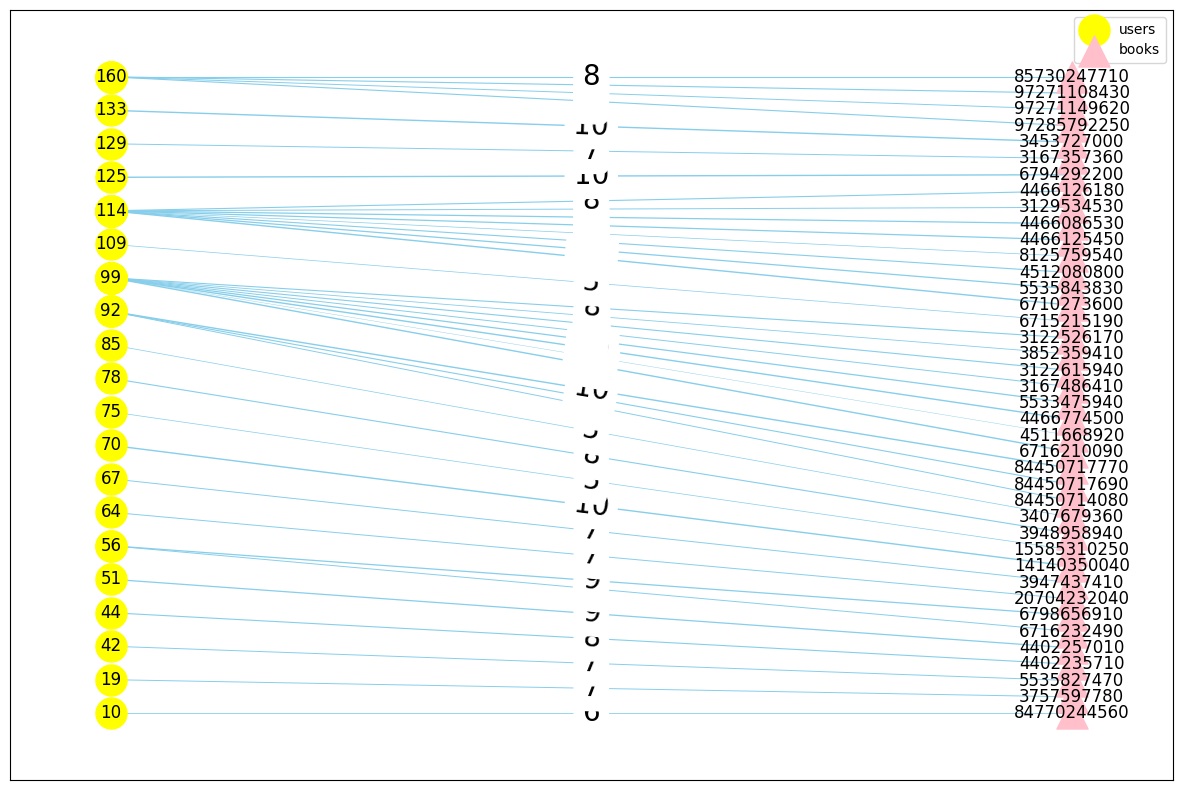

In [58]:
plt.figure(figsize=(15, 10))

pos = nx.bipartite_layout(G, user_nodes)

# Draw the graph
nx.draw_networkx_nodes(G, pos, nodelist=user_nodes, node_color='yellow', node_shape='o', label='users', node_size=500)
nx.draw_networkx_nodes(G, pos, nodelist=book_nodes, node_color='pink', node_shape='^', label='books',node_size=500)
nx.draw_networkx_edges(G, pos, edge_color='skyblue', width=[d['weight']*0.1 for (u, v, d) in G.edges(data=True)])

nx.draw_networkx_edge_labels(G, pos, edge_labels=dict_of_labels, font_size=20)
nx.draw_networkx_labels(G, pos)

plt.legend()
plt.show()

In [59]:
# Create a mapping from User-ID and ISBN to integer indices
user_to_index = {user: idx for idx, user in enumerate(ratings["User-ID"].unique())}
book_to_index = {book: idx for idx, book in enumerate(ratings["ISBN"].unique())}

# Convert User-ID and ISBN to integer indices
ratings["user_index"] = ratings["User-ID"].map(user_to_index)
ratings["book_index"] = ratings["ISBN"].map(book_to_index)

In [60]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15519 entries, 0 to 15518
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   User-ID      15519 non-null  int64
 1   Book-Rating  15519 non-null  int64
 2   ISBN         15519 non-null  Int64
 3   user_index   15519 non-null  int64
 4   book_index   15519 non-null  int64
dtypes: Int64(1), int64(4)
memory usage: 621.5 KB


In [61]:
ratings1K = ratings.head(1000)
print("Shape of sampled dataset:", ratings1K.shape)

Shape of sampled dataset: (1000, 5)


In [63]:
ratings1K.to_csv('ratings_with_indices.csv', index=False)

In [64]:
# Prepare the bipartite graph
user_node_indices = ratings1K["user_index"].values
book_node_indices = ratings1K["book_index"].values
ratings_values = ratings1K["Book-Rating"].values  # Use ratings if you want them as edge features

# Construct edge list and features
edge_index = torch.tensor([user_node_indices, book_node_indices], dtype=torch.long)
edge_features = torch.tensor(ratings_values, dtype=torch.float)

# Define user and book node features (you can customize these as per your dataset)
num_users = len(user_to_index)
num_books = len(book_to_index)

user_features = torch.eye(num_users)
book_features = torch.eye(num_books)[:num_users, :num_users]  # Use only the first num_users rows and columns

<ipython-input-64-f34733de7ba2>:7: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  edge_index = torch.tensor([user_node_indices, book_node_indices], dtype=torch.long)


In [65]:
print(num_users)

print(user_features.shape[0])

print(book_features.shape[0])

print(book_features.shape[1])

# Combine user and book features
features = torch.cat([user_features, book_features])
features.shape[1]

2662
2662
2662
2662


2662

In [66]:

# Create a Data object for PyTorch Geometric
# data = Data(x=features, edge_index=edge_index, edge_attr=edge_features)

# Create a Data object for PyTorch Geometric
data = Data(x=features, edge_index=edge_index, edge_attr=edge_features)

# Split data into training and testing sets
train_mask, test_mask = train_test_split(np.arange(data.num_edges), test_size=0.2, random_state=42)
train_mask = torch.tensor(train_mask)
test_mask = torch.tensor(test_mask)


In [67]:
# Define the Graph Neural Network model
class GNN(nn.Module):
    def __init__(self, num_features, hidden_dim, num_classes):
        super(GNN, self).__init__()
        # Define GCNConv or GraphConv layers
        self.conv1 = GCNConv(num_features, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, num_classes)

    def forward(self, data):
        x, edge_index, edge_attr = data.x, data.edge_index, data.edge_attr
        # Apply the first GNN layer
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        # Apply the second GNN layer
        x = self.conv2(x, edge_index)
        return x

# Create the model
num_features = features.shape[1]
hidden_dim = 16  # Define the size of the hidden layer
num_classes = 1  # Predicting one output (rating)

model = GNN(num_features, hidden_dim, num_classes)

# class GNN(nn.Module):
#     def __init__(self, num_features, hidden_dim):
#         super(GNN, self).__init__()
#         self.conv1 = GCNConv(num_features, hidden_dim)
#         self.conv2 = GCNConv(hidden_dim, hidden_dim)
#         self.lin = nn.Linear(hidden_dim, 1)

#     def forward(self, data):
#         x, edge_index, edge_attr = data.x, data.edge_index, data.edge_attr
#         x = self.conv1(x, edge_index)
#         x = torch.relu(x)
#         x = self.conv2(x, edge_index)
#         x = torch.relu(x)
#         x = self.lin(x)
#         return x


In [68]:
class GNN(nn.Module):
    def __init__(self, num_features, hidden_dim, num_classes):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(num_features, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.lin = nn.Linear(hidden_dim, 1)

    def forward(self, data):
        x, edge_index, edge_attr = data.x, data.edge_index, data.edge_attr
        print("Shape of x:", x.size())  # Debugging statement
        print("Type of x:", type(x))      # Debugging statement
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        x = torch.relu(x)
        x = self.lin(x)
        return x


# Create the model
num_features = features.shape[1]
hidden_dim = 16  # Define the size of the hidden layer
num_classes = 1  # Predicting one output (rating)


# Verify the structure of the Data object
print("Shape of features:", features.shape)
print("Shape of edge_index:", edge_index.shape)
print("Shape of edge_attr:", edge_features.shape)

# Verify that the input data object contains the required attributes
print("Shape of data.x:", data.x.size())
print("Shape of data.edge_index:", data.edge_index.size())
print("Shape of data.edge_attr:", data.edge_attr.size())


Shape of features: torch.Size([5324, 2662])
Shape of edge_index: torch.Size([2, 1000])
Shape of edge_attr: torch.Size([1000])
Shape of data.x: torch.Size([5324, 2662])
Shape of data.edge_index: torch.Size([2, 1000])
Shape of data.edge_attr: torch.Size([1000])


In [69]:
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training the model
num_epochs = 50

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    output = model(data)

    # Calculate loss for the training set
    train_loss = criterion(output[train_mask], data.edge_attr[train_mask])

    # Backward pass
    train_loss.backward()
    optimizer.step()

    # Print training loss every epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {train_loss.item()}")

# Testing the model
model.eval()
with torch.no_grad():
    output = model(data)
    test_predictions = output[test_mask].squeeze()
    test_targets = data.edge_attr[test_mask]
    test_mse = mean_squared_error(test_targets, test_predictions)
    print(f"Test MSE: {test_mse}")



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([800])) that is different to the input size (torch.Size([800, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/50, Training Loss: 62.17815017700195
Epoch 2/50, Training Loss: 61.184051513671875
Epoch 3/50, Training Loss: 60.094573974609375
Epoch 4/50, Training Loss: 58.88896179199219
Epoch 5/50, Training Loss: 57.59714889526367
Epoch 6/50, Training Loss: 56.24608612060547
Epoch 7/50, Training Loss: 54.844451904296875
Epoch 8/50, Training Loss: 53.39677429199219
Epoch 9/50, Training Loss: 51.90596389770508
Epoch 10/50, Training Loss: 50.374542236328125
Epoch 11/50, Training Loss: 48.804954528808594
Epoch 12/50, Training Loss: 47.199668884277344
Epoch 13/50, Training Loss: 45.56132507324219
Epoch 14/50, Training Loss: 43.89276123046875
Epoch 15/50, Training Loss: 42.197086334228516
Epoch 16/50, Training Loss: 40.47767639160156
Epoch 17/50, Training Loss: 38.73822784423828
Epoch 18/50, Training Loss: 36.98273849487305
Epoch 19/50, Training Loss: 35.21555709838867
Epoch 20/50, Training Loss: 33.44134521484375
Epoch 21/50, Training Loss: 31.66510009765625
Epoch 22/50, Training Loss: 29.89213

In [84]:
# Book recommendation function
def recommend_books(user_id, model, data, top_n=5):
    # Convert user ID to user index
    user_index = user_to_index[user_id]

    # Get the user node embedding from the model
    with torch.no_grad():
        output = model(data)
#         user_embedding = output[data.user_index == user_id]
        user_embedding = output[user_index]

    # Calculate the similarity of user embedding with book embeddings
    book_embeddings = output[num_users:]
    similarities = torch.matmul(user_embedding, book_embeddings.T)

    # Get the top N recommended books
    recommended_books_indices = torch.argsort(similarities, descending=True)[:top_n]

    # Convert book indices to ISBN
    recommended_books = [list(book_to_index.keys())[list(book_to_index.values()).index(book_index.item())] for book_index in recommended_books_indices]

    return recommended_books


In [85]:
user_id = 10  # Ensure user_id is an integer
top_n = 5

if user_id in user_to_index:
    recommended_books = recommend_books(user_id, model, data, top_n)
    print(f"Recommended books for user {user_id}: {recommended_books}")
else:
    print(f"User {user_id} not found in user_to_index dictionary.")


Recommended books for user 10: [32572124290, 71238170, 3423113600, 35962926460, 34980208620]


In [94]:
# Define a range of user IDs from 1 to 50
user_ids = range(1, 51)

# Initialize a counter variable
count = 0

# Iterate over each user ID
for user_id in user_ids:
    try:
        # Get recommendations for the current user ID
        recommended_books = recommend_books(user_id, model, data, top_n)
        print(f"Recommended books for user {user_id}: {recommended_books}")
    except KeyError:
        print(f"No recommendations found for user {user_id}")

    # Increment the counter
    count += 1

    # Break the loop after processing the first 10 users
    if count >= 50:
        break


No recommendations found for user 1
No recommendations found for user 2
No recommendations found for user 3
No recommendations found for user 4
No recommendations found for user 5
No recommendations found for user 6
No recommendations found for user 7
No recommendations found for user 8
No recommendations found for user 9
Recommended books for user 10: [32572124290, 71238170, 3423113600, 35962926460, 34980208620]
No recommendations found for user 11
No recommendations found for user 12
No recommendations found for user 13
No recommendations found for user 14
No recommendations found for user 15
No recommendations found for user 16
No recommendations found for user 17
No recommendations found for user 18
Recommended books for user 19: [32572124290, 71238170, 3423113600, 35962926460, 34980208620]
No recommendations found for user 20
No recommendations found for user 21
No recommendations found for user 22
No recommendations found for user 23
No recommendations found for user 24
No recomm

In [ ]:
print(data)

Data(x=[5324, 2662], edge_index=[2, 1000], edge_attr=[1000])


In [ ]:
print("Feature matrix (x):")
print(data.x)
print("Edge indices (edge_index):")
print(data.edge_index)
print("Edge attributes (edge_attr):")
print(data.edge_attr)


Feature matrix (x):
tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])
Edge indices (edge_index):
tensor([[  0,   1,   2,  ..., 175, 176, 177],
        [  0,   1,   2,  ..., 914, 973, 974]])
Edge attributes (edge_attr):
tensor([ 6.,  7.,  7.,  8.,  9.,  7.,  9.,  7.,  7., 10.,  5.,  8.,  5.,  7.,
         8., 10., 10.,  3., 10.,  9.,  7.,  8.,  6.,  8.,  5., 10.,  9.,  8.,
         5.,  9.,  9.,  7.,  8., 10.,  7., 10.,  8.,  7.,  8.,  8.,  6.,  7.,
         5.,  9.,  4.,  4.,  6.,  3.,  7.,  9.,  8.,  8.,  8.,  8.,  9.,  8.,
         8.,  9.,  9.,  7.,  9.,  9.,  8., 10.,  9.,  8.,  8.,  9.,  9.,  9.,
         9.,  8.,  8.,  6.,  7.,  9.,  9.,  8.,  6.,  6.,  9.,  7.,  6.,  8.,
        10.,  9.,  7.,  9.,  7.,  9.,  8.,  6.,  7., 10.,  8.,  8.,  8.,  7.,
         8.,  7.,  6.,  8.,  8.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GNNRecommender(nn.Module):
    def __init__(self, num_users, num_items, num_features, hidden_dim):
        super(GNNRecommender, self).__init__()
        self.num_users = num_users
        self.num_items = num_items
        self.conv1 = GCNConv(num_features, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.lin = nn.Linear(hidden_dim, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        user_embeddings = x[:self.num_users]
        item_embeddings = x[self.num_users:]
        x = self.lin(item_embeddings)
        return user_embeddings, item_embeddings, x

# Prepare dummy data
num_users = 5
num_items = 5
num_features = 10
user_features = torch.randn(num_users, num_features)
item_features = torch.randn(num_items, num_features)
features = torch.cat([user_features, item_features])

edge_index = torch.tensor([[0, 1, 2, 3, 4, 0, 1, 2, 3, 4],
                           [5, 5, 5, 5, 5, 6, 6, 6, 6, 6]], dtype=torch.long)

edge_attr = torch.tensor([1.0, 2.0, 3.0, 4.0, 5.0, 5.0, 4.0, 3.0, 2.0, 1.0], dtype=torch.float)

data = Data(x=features, edge_index=edge_index, edge_attr=edge_attr)

# Train the model
model = GNNRecommender(num_users, num_items, num_features, hidden_dim=64)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

model.train()
optimizer.zero_grad()
user_embeddings, item_embeddings, output = model(data)
loss = criterion(output, data.edge_attr)
loss.backward()
optimizer.step()

# Test the model
model.eval()
with torch.no_grad():
    user_embeddings, item_embeddings, output = model(data)
    print(user_embeddings)
    print(item_embeddings)
    print(output)


tensor([[1.5952e-01, 1.0752e-01, 0.0000e+00, 2.2771e-01, 0.0000e+00, 0.0000e+00,
         1.2953e-02, 0.0000e+00, 0.0000e+00, 1.6540e-01, 0.0000e+00, 0.0000e+00,
         6.0481e-01, 1.2214e+00, 0.0000e+00, 2.4215e-01, 0.0000e+00, 2.1219e-01,
         0.0000e+00, 1.1917e-01, 0.0000e+00, 7.2121e-02, 0.0000e+00, 0.0000e+00,
         1.4508e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.4267e-01,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 3.8916e-01, 3.7161e-01, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 5.1605e-02, 0.0000e+00, 0.0000e+00, 9.6229e-02,
         0.0000e+00, 4.2075e-01, 3.0423e-02, 1.1769e-01, 8.5395e-01, 3.0076e-01,
         4.5347e-01, 1.2570e-01, 0.0000e+00, 2.7389e-01, 0.0000e+00, 3.9608e-01,
         3.2136e-01, 1.3760e-01, 0.0000e+00, 0.0000e+00],
        [2.1554e-01, 0.0000e+00, 0.0000e+00, 5.3584e-02, 0.0000e+00, 6.9381e-03,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000

C:\Users\Mukand\anaconda2023\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [ ]:
import torch

def recommend_items(model, user_id, top_n=5):
    """
    Recommend top N items for a given user.

    Args:
        model (GNNRecommender): The trained GNN recommender model.
        user_id (int): The ID of the user for whom to make recommendations.
        top_n (int): The number of top recommendations to return.

    Returns:
        list: A list of recommended item IDs.
    """
    model.eval()
    with torch.no_grad():
        user_embeddings, item_embeddings, _ = model(data)
        user_embedding = user_embeddings[user_id]
        similarities = torch.matmul(user_embedding, item_embeddings.T)
        top_items = torch.argsort(similarities, descending=True)[:top_n]

        # Convert item indices to item IDs
        recommended_items = [item_id.item() for item_id in top_items]

    return recommended_items

# Example usage
user_id = 1
top_n = 5
recommended_items = recommend_items(model, user_id, top_n)
print(f"Recommended items for user {user_id}: {recommended_items}")


Recommended items for user 1: [0, 1, 4, 2, 3]


In [ ]:
# Example usage
user_id = 1
top_n = 5
recommended_items = recommend_items(model, user_id, top_n)
print(f"Recommended items for user {user_id}: {recommended_items}")


Recommended items for user 1: [tensor(0), tensor(1), tensor(4), tensor(2), tensor(3)]


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import pandas as pd

class GNNRecommender(nn.Module):
    def __init__(self, num_users, num_items, num_features, hidden_dim):
        super(GNNRecommender, self).__init__()
        self.num_users = num_users
        self.num_items = num_items
        self.conv1 = GCNConv(num_features, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.lin = nn.Linear(hidden_dim, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        user_embeddings = x[:self.num_users]
        item_embeddings = x[self.num_users:]
        x = self.lin(item_embeddings)
        return user_embeddings, item_embeddings, x

# Prepare the data
df = pd.DataFrame({
    "User-ID": [10, 19, 42, 44, 51, 56, 56, 64, 67, 70],
    "ISBN": ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"],
    "Book-Rating": [6, 7, 7, 8, 9, 7, 9, 7, 7, 10]
})

# Create user and item features
num_users = df["User-ID"].nunique()
num_items = df["ISBN"].nunique()
num_features = 10  # Assuming 10 features per user and item
user_features = torch.randn(num_users, num_features)
item_features = torch.randn(num_items, num_features)
features = torch.cat([user_features, item_features])

# Create a mapping for ISBN numbers to sequential indices
isbn_to_index = {isbn: idx + 1 for idx, isbn in enumerate(df["ISBN"].unique())}
df["ISBN_Index"] = df["ISBN"].map(isbn_to_index)

# Create edge index and edge attributes
user_ids = df["User-ID"].values
item_ids = df["ISBN_Index"].values
edge_index = torch.tensor([user_ids, item_ids], dtype=torch.long)
edge_attr = torch.tensor(df["Book-Rating"].values, dtype=torch.float)

# Create PyTorch Geometric Data object
data = Data(x=features, edge_index=edge_index, edge_attr=edge_attr)

# Train the model
model = GNNRecommender(num_users, num_items, num_features, hidden_dim=64)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

model.train()
optimizer.zero_grad()
user_embeddings, item_embeddings, output = model(data)
loss = criterion(output, data.edge_attr)
loss.backward()
optimizer.step()

# Test the model
model.eval()
with torch.no_grad():
    user_embeddings, item_embeddings, output = model(data)

# Recommendation function
def recommend_items(model, user_id, top_n=5):
    model.eval()
    with torch.no_grad():
        user_embeddings, item_embeddings, _ = model(data)
        user_embedding = user_embeddings[user_id]
        similarities = torch.matmul(user_embedding, item_embeddings.T)
        top_items = torch.argsort(similarities, descending=True)[:top_n]
        recommended_items = [df[df["ISBN_Index"] == item_id.item()]["ISBN"].values[0] for item_id in top_items]
    return recommended_items

# Example usage
user_id = 10
top_n = 5
recommended_items = recommend_items(model, user_id, top_n)
print(f"Recommended books for user {user_id}: {recommended_items}")


IndexError: index 19 is out of bounds for dimension 0 with size 19